In [1]:
# Importar dependências
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('precision', 2)

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Criando o objeto modelo e variável para indicar a pasta com os dados
data_path = '../input/Teste5/'
geo_model = gp.create_model('SyntheticLake')

In [3]:
# Inicializando os dados, a extensão e a resolução do modelo.
gp.init_data(geo_model,
             extent=[0, 2000, -2000, 2000, -100, 1200],
             resolution=[130, 250, 85],
             path_i=data_path + "8_lago_sintetico_ligando_camadas_outros_testes/surfaces_points.csv",
             path_o=data_path + "8_lago_sintetico_ligando_camadas_outros_testes/orientations_points.csv")

Active grids: ['regular']


SyntheticLake  2023-03-20 13:43

In [ ]:
# Ver a ordem das formações
geo_model.surfaces

In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base))
#gp.map_stack_to_surfaces(geo_model,                         
#                         {"Strat_Series_1": ('Formacao_1'),
#                          "Strat_Series_2": ('Formacao_2')
#                          "Strat_Series_2": ('Formacao_3')
#                          "Strat_Series_2": ('Formacao_4')})
gp.map_stack_to_surfaces(geo_model,                         
                         {"SF_series": ('SeaFloor'),
                          "f1_series": ('f1'),
                          "f2_series": ('f2'),
                          "f3_series": ('f3'),
                          "base_series": ('basement')})


,surface,series,order_surfaces,color,id
0,SeaFloor,SF_series,1,#015482,1
1,f1,f1_series,1,#9f0052,2
2,f2,f2_series,1,#ffbe00,3
3,f3,f3_series,1,#728f02,4
4,basement,base_series,1,#443988,5


In [ ]:
#Criando dados de orientação (Caso não tenha um csv importando)
geo_model.add_orientations(X=1000, Y=500, Z=650, surface="Formacao_1", pole_vector=(0,0,1))
geo_model.add_orientations(X=1000, Y=-500, Z=650, surface="Formacao_1", pole_vector=(0,0,1))
geo_model.add_orientations(X=1000, Y=500, Z=450, surface="Formacao_2", pole_vector=(0,0,1))
geo_model.add_orientations(X=1000, Y=-500, Z=450, surface="Formacao_2", pole_vector=(0,0,1))
geo_model.add_orientations(X=1000, Y=500, Z=150, surface="Formacao_3", pole_vector=(0,0,1))
geo_model.add_orientations(X=1000, Y=-500, Z=150, surface="Formacao_3", pole_vector=(0,0,1))
geo_model.add_orientations(X=1000, Y=500, Z=0, surface="Formacao_4", pole_vector=(0,0,1))
geo_model.add_orientations(X=1000, Y=-500, Z=0, surface="Formacao_4", pole_vector=(0,0,1))

In [ ]:
# Ver os dados de surface points
#geo_model.surface_points

# Ver os dados de orientations points
geo_model.orientations

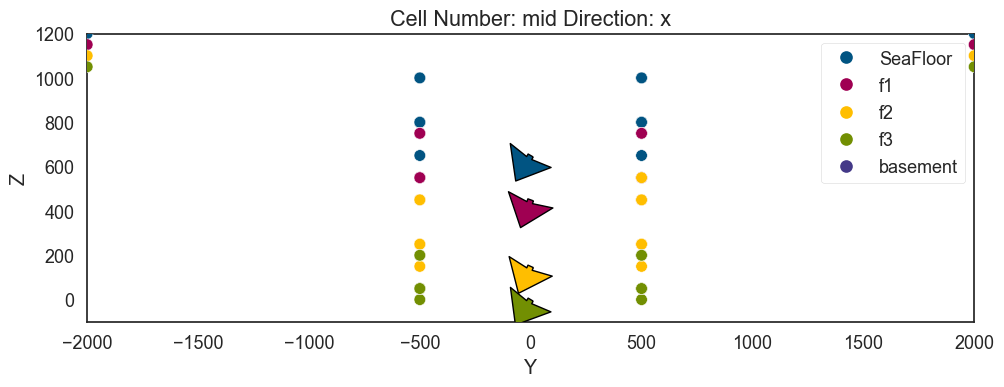

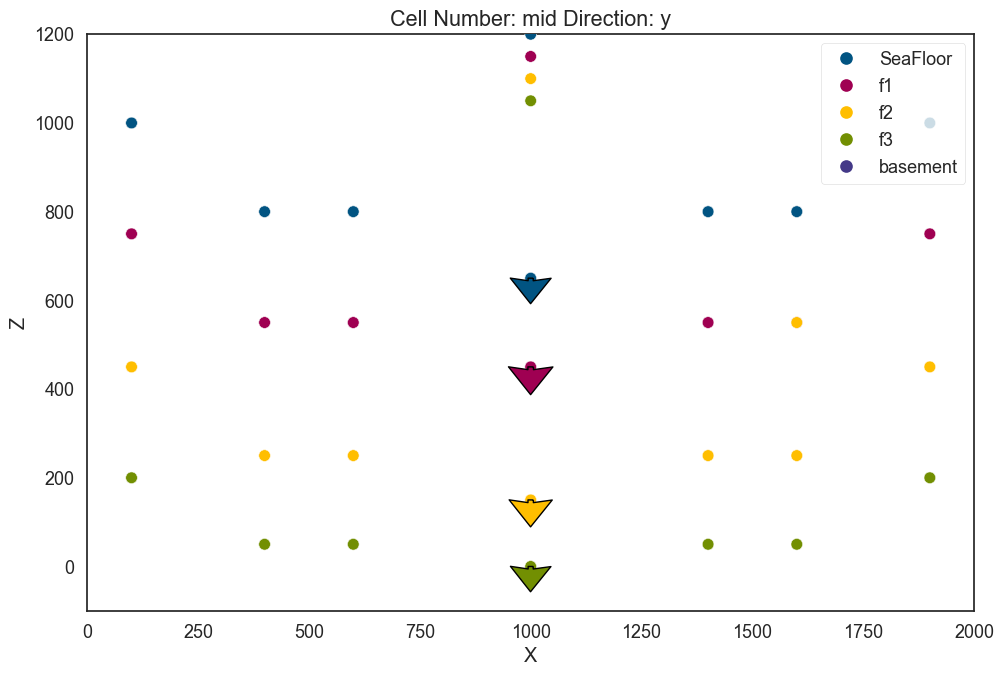

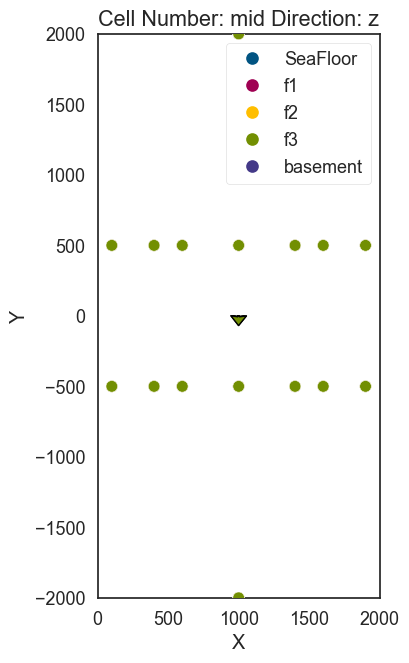

In [5]:
# Ver em 2D os dados nas 3 direções
gp.plot_2d(geo_model, direction=['x'], show_data=True)

gp.plot_2d(geo_model, direction=['y'], show_data=True)

gp.plot_2d(geo_model, direction=['z'], show_data=True)

In [ ]:
# Ver o grid do modelo
geo_model.grid

In [ ]:
plot = gp.plot_2d(geo_model, show_lith=False, show_boundaries=False)
plt.show()

In [ ]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=True)


In [ ]:
# Adicionar uma topografia randômica 
geo_model.set_topography(source='random')
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'])
plt.show()

In [7]:
%%time
# Interpolador
gp.set_interpolator(geo_model,
                    theano_optimizer='fast_run',
                    compile_theano=True
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                           values
range                    4657.25
$C_o$                  516428.57
drift equations  [3, 3, 3, 3, 3]
Wall time: 3.67 s


In [8]:
%%time
# Computar a solução do modelo
sol = gp.compute_model(geo_model, compute_mesh=True)

Wall time: 31.8 s


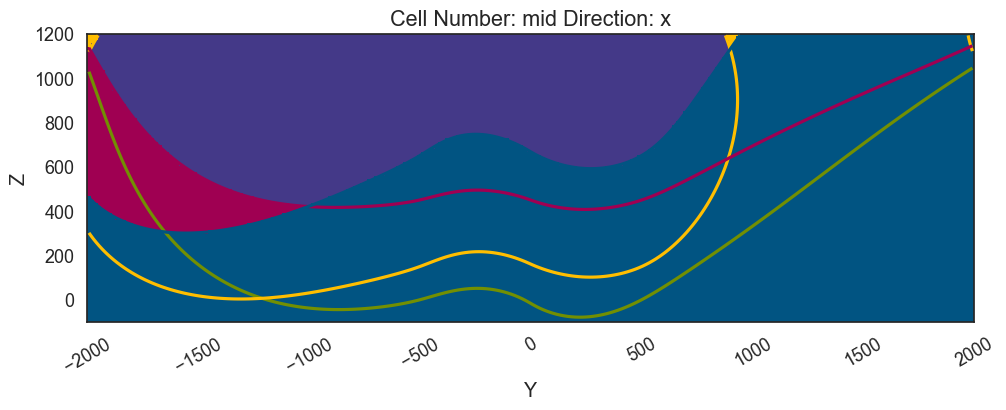

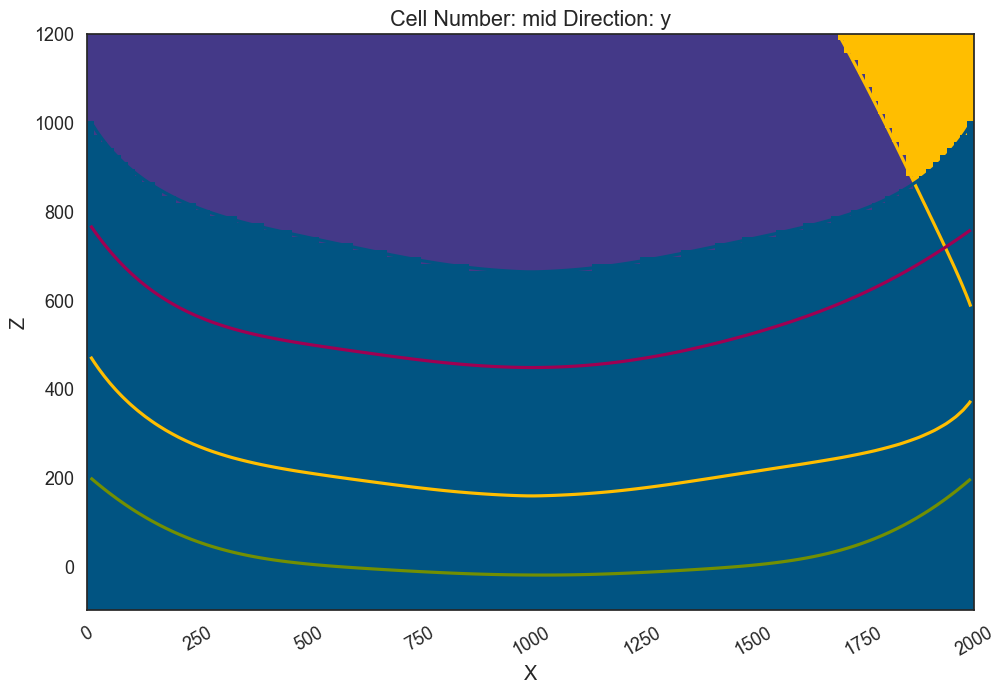

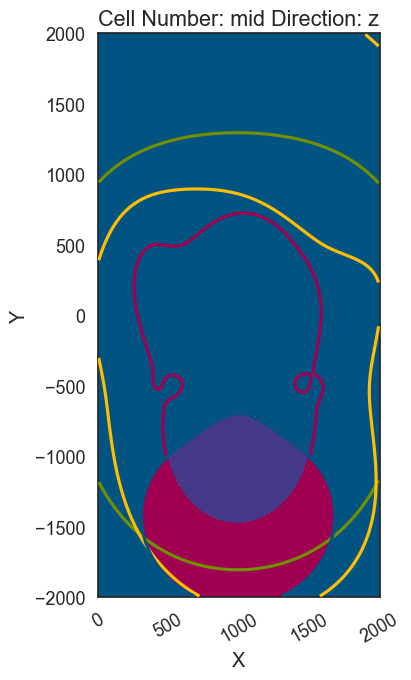

In [9]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="z", show_data=False, show_lith=True)

In [10]:
# Visualizar o modelo em 3D
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=False)

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(geo_model)